In [61]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_data.csv')
test  = pd.read_csv('test_data.csv')

In [3]:
# Make original copies
train_orig = train.copy()
test_orig = test.copy()

In [4]:
train_orig.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_orig.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
#View variable datatypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Y    422
N    192
Name: Loan_Status, dtype: int64


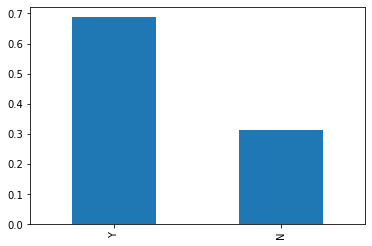

In [7]:
# Univariate Analysis
print(train['Loan_Status'].value_counts())
(train['Loan_Status'].value_counts(normalize =True)).plot.bar()

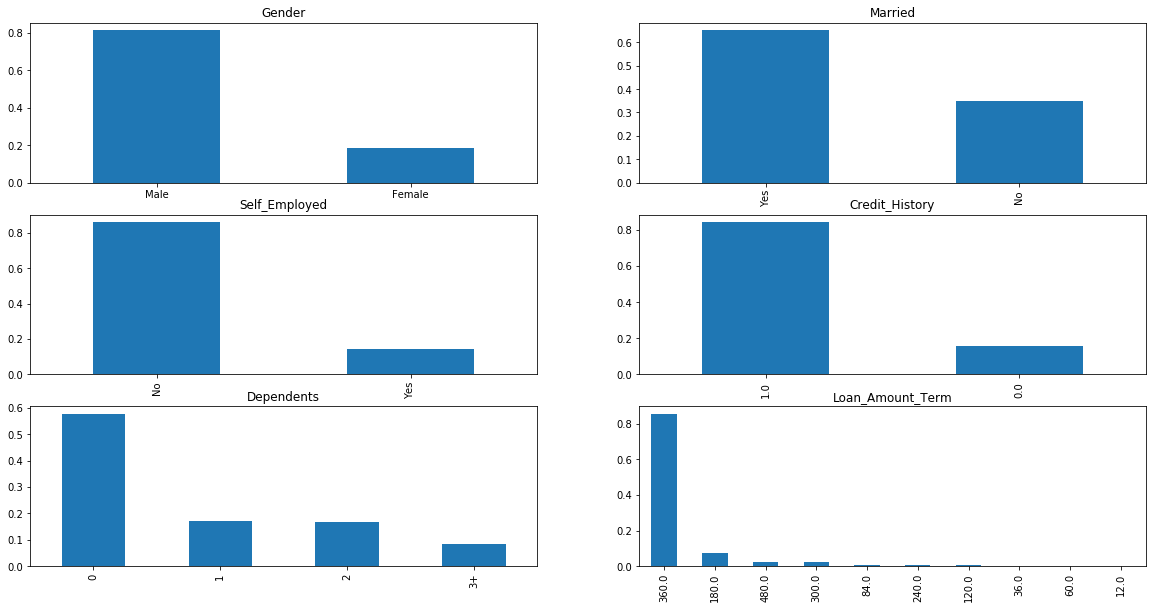

In [8]:
plt.figure(1,figsize=(21,10)) 
plt.subplot(321) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')
plt.xticks(rotation=0)
plt.subplot(322)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(323)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(324)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.subplot(325)
train['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents') 
plt.subplot(326)
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')
plt.show()

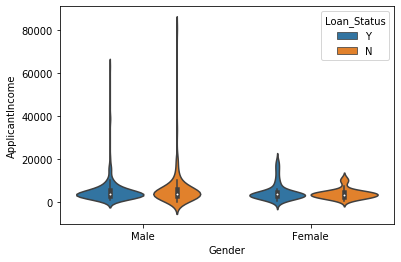

In [9]:
sns.violinplot(x='Gender',y='ApplicantIncome',data= train,hue='Loan_Status')

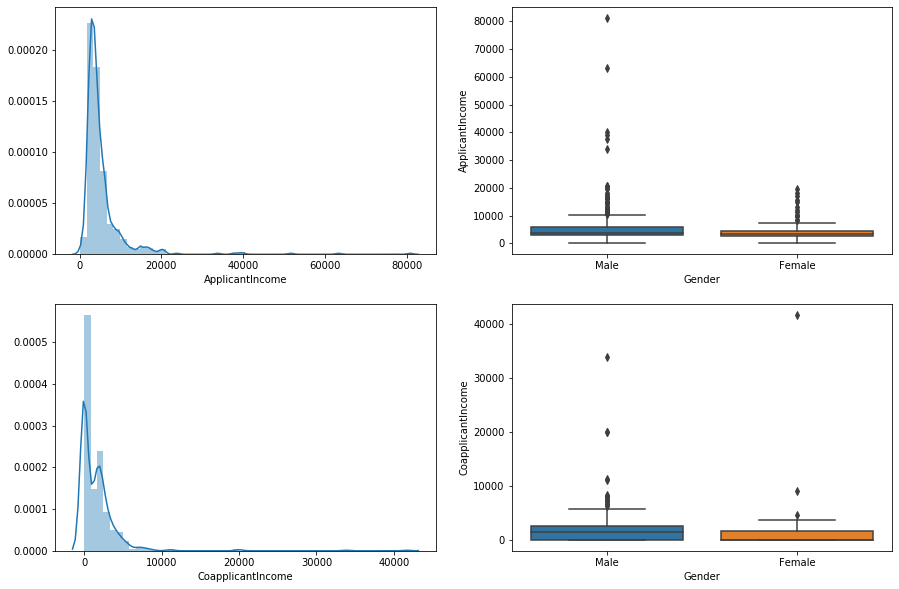

In [10]:
plt.figure(1,figsize=(15,10))
plt.subplot(221)
sns.distplot(train['ApplicantIncome'])
plt.subplot(222)
sns.boxplot(x='Gender',y='ApplicantIncome',data= train)
plt.subplot(223)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(224)
sns.boxplot(x='Gender',y='CoapplicantIncome',data= train)
plt.show()

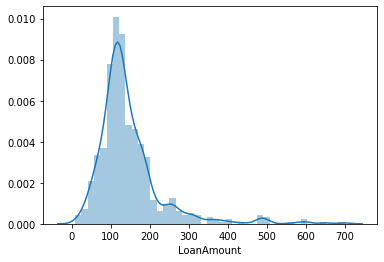

In [11]:
sns.distplot(train['LoanAmount'])

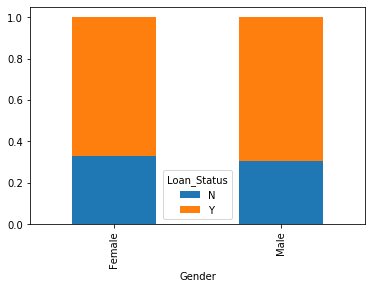

In [12]:
bi_gender= pd.crosstab(train['Gender'],train['Loan_Status'])
bi_gender.div(bi_gender.sum(1),axis=0).plot.bar(stacked=True)

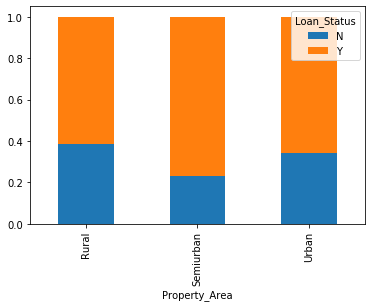

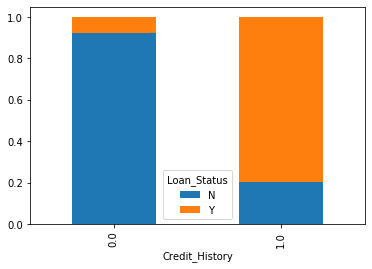

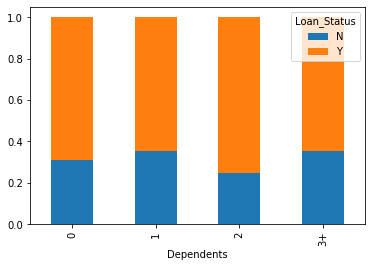

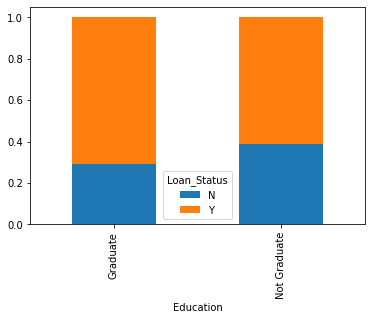

In [13]:

bi_loc= pd.crosstab(train['Property_Area'],train['Loan_Status'])
bi_loc.div(bi_loc.sum(1),axis=0).plot.bar(stacked=True)


bi_ch= pd.crosstab(train['Credit_History'],train['Loan_Status'])
bi_ch.div(bi_ch.sum(1),axis=0).plot.bar(stacked=True)


bi_dep= pd.crosstab(train['Dependents'],train['Loan_Status'])
bi_dep.div(bi_dep.sum(1),axis=0).plot.bar(stacked=True)


bi_edu= pd.crosstab(train['Education'],train['Loan_Status'])
bi_edu.div(bi_edu.sum(1),axis=0).plot.bar(stacked=True)



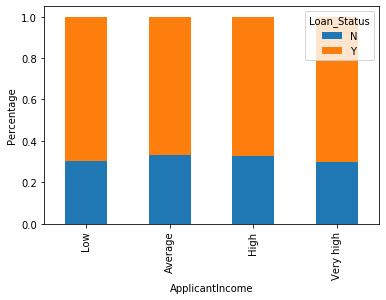

In [14]:
bins=[0,4000,8000,12000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

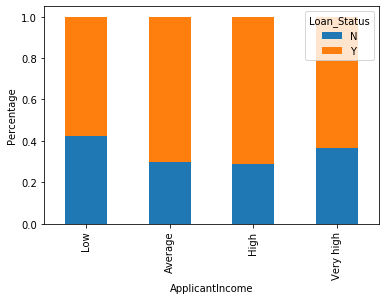

In [15]:
bins=[0,3000,8000,12000,81000] 
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
group=['Low','Average','High', 'Very high'] 
train['TotalIncome_bin']=pd.cut(train['TotalIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['TotalIncome_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

,index,0
1,Gender,13
2,Married,3
3,Dependents,15
5,Self_Employed,32
8,LoanAmount,22
9,Loan_Amount_Term,14
10,Credit_History,50


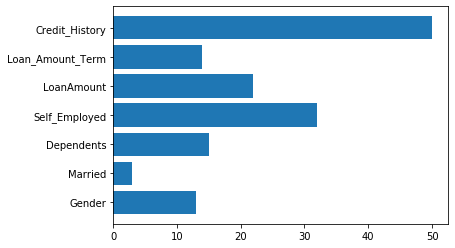

In [16]:
# Null value handling
#Check for NULL values counts
NULL = pd.DataFrame(train.isnull().sum()).reset_index()
NULL = NULL[NULL[0]!=0]
plt.barh(NULL['index'],NULL[0])
NULL


In [17]:
ent_with_multiple_null = train[train.isnull().sum(axis=1) > 1]
# T = pd.Series(ent_with_multiple_null)

In [18]:
ent_with_multiple_null

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y,Low,6100.0,Average
24,LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N,Low,6642.0,Average
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N,Average,7535.0,Average
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N,Average,6782.0,Average
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y,Very high,13650.0,Very high
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y,Low,4570.0,Average
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y,Average,4758.0,Average
236,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N,Average,5746.0,Average
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y,Average,9993.0,High
411,LP002319,Male,Yes,0,Graduate,NaN,6256,0.0,160.0,360.0,NaN,Urban,Y,Average,6256.0,Average


In [19]:
# impute null values
train = train_orig
test = test_orig

In [20]:
import statistics as st
train['Gender'].fillna(st.mode(train['Gender']),inplace = True)
train['Married'].fillna(st.mode(train['Married']),inplace = True)
train['Dependents'].fillna(st.mode(train['Dependents']),inplace = True)
train['Self_Employed'].fillna(st.mode(train['Self_Employed']),inplace = True)
train['Credit_History'].fillna(st.mode(train['Credit_History']),inplace = True)

In [21]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(st.mode(train['Loan_Amount_Term']),inplace=True)

In [23]:
# Check for NULL values again
NULL = pd.DataFrame(train.isnull().sum()).reset_index()
NULL = NULL[NULL[0]!=0]
NULL

,index,0


In [24]:
# Apply the same imputataions in the test set
test['Gender'].fillna(st.mode(test['Gender']),inplace = True)
test['Married'].fillna(st.mode(test['Married']),inplace = True)
test['Dependents'].fillna(st.mode(test['Dependents']),inplace = True)
test['Self_Employed'].fillna(st.mode(test['Self_Employed']),inplace = True)
test['Credit_History'].fillna(st.mode(test['Credit_History']),inplace = True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(st.mode(test['Loan_Amount_Term']),inplace=True)

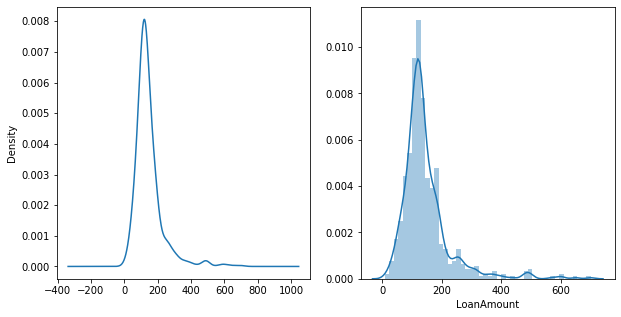

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(121)
train['LoanAmount'].plot(kind='kde')
plt.subplot(122)
sns.distplot(train['LoanAmount'])

In [26]:
# Log Transformation to remove the right skew
train['LoanAmount'] = np.log(train['LoanAmount'])
test['LoanAmount'] = np.log(test['LoanAmount'])


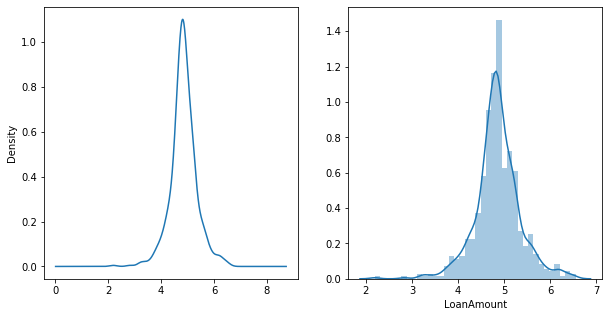

In [27]:
plt.figure(figsize=(10,5))
plt.subplot(121)
train['LoanAmount'].plot(kind='kde')
plt.subplot(122)
sns.distplot(train['LoanAmount'])

In [28]:
# Log Transformation to remove the right skew
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome'] = np.log(train['TotalIncome'])
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test['TotalIncome'] = np.log(test['TotalIncome'])

0.5446574620738442
0.061189233132516486


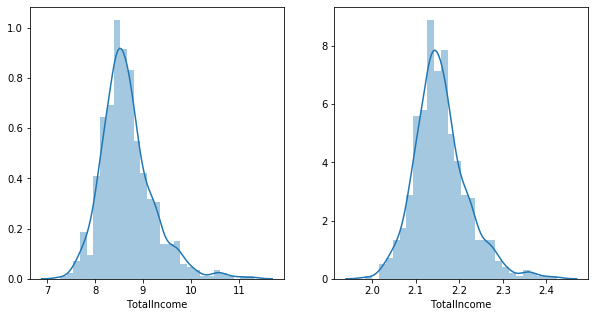

In [29]:
# Doing similar analysis for TotalIncome
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(train['TotalIncome'])
plt.subplot(122)
sns.distplot(np.log(train['TotalIncome']))

print(np.std(train['TotalIncome']))
print(np.std(np.log(train['TotalIncome'])))

In [30]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
TotalIncome          float64
dtype: object

###  Model Building

#### 1. GLM

In [31]:
model1 = glm(formula = "Loan_Status ~ TotalIncome + Credit_History + LoanAmount + Loan_Amount_Term + Gender + Married + Dependents + Education + Self_Employed + Property_Area",
               data = train,
               family=sm.families.Binomial(),).fit()

In [32]:
model1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Generalized linear model
===================================================================================
Model:              GLM                                  AIC:            588.8428  
Link Function:      logit                                BIC:            -3291.1542
Dependent Variable: ['Loan_Status[N]', 'Loan_Status[Y]'] Log-Likelihood: -280.42   
Date:               2020-04-05 15:50                     LL-Null:        -381.45   
No. Observations:   614                                  Deviance:       560.84    
Df Model:           13                                   Pearson chi2:   607.      
Df Residuals:       600                                  Scale:          1.0000    
Method:             IRLS                                                           
------------------------------------------------------------------------------------
                                 Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------------------------
Intercept                        1.7927    1.9745   0.9079  0.3639  -2.0772   5.6625
Gender[T.Male]                   0.0481    0.2982   0.1612  0.8719  -0.5365   0.6326
Married[T.Yes]                  -0.5870    0.2522  -2.3278  0.0199  -1.0813  -0.0928
Dependents[T.1]                  0.4410    0.2934   1.5029  0.1329  -0.1341   1.0161
Dependents[T.2]                 -0.2843    0.3415  -0.8323  0.4052  -0.9537   0.3851
Dependents[T.3+]                 0.0028    0.4148   0.0067  0.9947  -0.8102   0.8158
Education[T.Not Graduate]        0.3671    0.2603   1.4106  0.1584  -0.1430   0.8772
Self_Employed[T.Yes]             0.0081    0.3179   0.0253  0.9798  -0.6151   0.6312
Property_Area[T.Semiurban]      -0.9065    0.2694  -3.3642  0.0008  -1.4346  -0.3784
Property_Area[T.Urban]          -0.1929    0.2592  -0.7442  0.4567  -0.7011   0.3152
TotalIncome                     -0.0812    0.2732  -0.2974  0.7661  -0.6166   0.4542
Credit_History                  -3.9045    0.4199  -9.2989  0.0000  -4.7275  -3.0815
LoanAmount                       0.3562    0.2999   1.1878  0.2349  -0.2316   0.9439
Loan_Amount_Term                 0.0009    0.0018   0.5273  0.5980  -0.0026   0.0045
===================================================================================

"""

In [33]:
model2 = glm(formula = "Loan_Status ~ TotalIncome + Credit_History + LoanAmount + Loan_Amount_Term + Gender",
               data = train,
               family=sm.families.Binomial(),).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Loan_Status[N]', 'Loan_Status[Y]']   No. Observations:                  614
Model:                                              GLM   Df Residuals:                      608
Model Family:                                  Binomial   Df Model:                            5
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -293.33
Date:                                  Sun, 05 Apr 2020   Deviance:                       586.65
Time:                                          15:50:32   Pearson chi2:                     615.
No. Iterations:                                       5                                         
Covariance Type:                              nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.0585      1.840      1.118      0.263      -1.549       5.666
Gender[T.Male]      -0.1159      0.270     -0.430      0.667      -0.644       0.412
TotalIncome         -0.1182      0.262     -0.450      0.652      -0.632       0.396
Credit_History      -3.7853      0.408     -9.266      0.000      -4.586      -2.985
LoanAmount           0.2616      0.288      0.910      0.363      -0.302       0.825
Loan_Amount_Term     0.0007      0.002      0.420      0.674      -0.003       0.004
====================================================================================
"""

In [37]:
out = pd.DataFrame()
out['Loan_ID'] = test['Loan_ID']

out['output'] = (model2.predict(test)>=0.1).astype(int)
out['Loan_Status'] = list('Y' if x ==1 else 'N' for x in out['output'])

In [38]:
submission = out[['Loan_ID','Loan_Status']]

submission.to_csv('Submission1.csv',index=False)

submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


#### 2. Using scikit-learn

In [39]:
X = train.drop(['Loan_Status','Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1) 
y = train['Loan_Status']

In [40]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train)
test1 = test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'],axis=1)
test1=pd.get_dummies(test1)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.2)

In [42]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
model = LogisticRegression() 
model.fit(x_train, y_train)

/home/dsi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
pred_cv = model.predict(x_cv)

In [45]:
accuracy_score(y_cv,pred_cv)

0.8048780487804879

In [46]:
pred_test = model.predict(test1)

In [47]:
out = pd.DataFrame()
out['Loan_ID'] = test['Loan_ID']
out['Loan_Status'] = pred_test

In [48]:
out['Loan_Status'].value_counts()

Y    307
N     60
Name: Loan_Status, dtype: int64

In [49]:
submission = out[['Loan_ID','Loan_Status']]

submission.to_csv('Submission1.csv',index=False)

submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


#### Adding Validation Technique

In [99]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

In [102]:
i=1
skf = StratifiedKFold(shuffle=True,random_state=2)

skf.get_n_splits(X,y)

for tr_idx,te_idx in skf.split(X,y):
    print('\n{} of kfold {}'.format(i,skf.n_splits))
    xtr,xvl = X.loc[tr_idx],X.loc[te_idx]
    ytr,yvl = y[tr_idx],y[te_idx]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    y_pr = model.predict(xvl)
    print('Accuracy is {}'.format(accuracy_score(yvl,y_pr)))
    i+=1
    pred_test = model.predict(test1) 
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
Accuracy is 0.8536585365853658

2 of kfold 5
Accuracy is 0.7967479674796748

3 of kfold 5
Accuracy is 0.8292682926829268

4 of kfold 5
Accuracy is 0.7560975609756098

5 of kfold 5
Accuracy is 0.8114754098360656


In [103]:
yvl = np.where(yvl == 'Y',1,0)
ypr = np.where(np.array(y_pr) == 'Y',1,0)

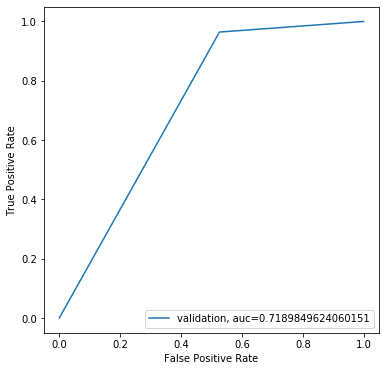

In [107]:
fpr,tpr,_ = metrics.roc_curve(yvl,ypr,drop_intermediate=False)
auc = metrics.roc_auc_score(yvl,ypr,)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()